In [67]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [68]:
df = pd.read_csv('normalizee(1).csv', index_col=0)
#print(df.head(10))

Training Features Shape: (68187, 14)
Training Labels Shape: (68187,)
Testing Features Shape: (17047, 14)
Testing Labels Shape: (17047,)


C:\Users\venky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


training ------------------------------------------
Coefficients =  [[ 3.96753899e-06  1.81570944e+00  1.39522247e-01  3.09559692e-01
   2.32385270e-01 -8.87847464e-02  1.27589779e-01 -1.46288383e-01
   8.24022105e-02 -4.28722510e-02 -2.84896739e-02 -1.34875699e-02
  -1.93677259e-01 -1.41515347e-02]]
Intercept =  [-0.29267829]
Accuracy 0.7924677724492939
Confusion = [[25557  8499]
 [ 5652 28479]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78     34056
           1       0.77      0.83      0.80     34131

   micro avg       0.79      0.79      0.79     68187
   macro avg       0.79      0.79      0.79     68187
weighted avg       0.79      0.79      0.79     68187

AUC: 0.792


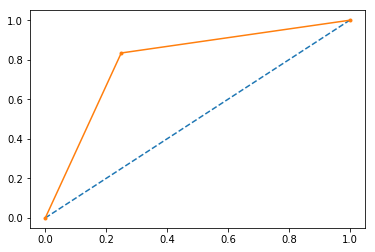

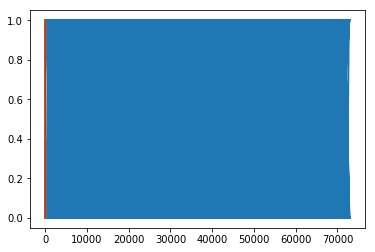

testing----------------------------------------------
Coefficients =  [[ 3.96753899e-06  1.81570944e+00  1.39522247e-01  3.09559692e-01
   2.32385270e-01 -8.87847464e-02  1.27589779e-01 -1.46288383e-01
   8.24022105e-02 -4.28722510e-02 -2.84896739e-02 -1.34875699e-02
  -1.93677259e-01 -1.41515347e-02]]
Intercept =  [-0.29267829]
Accuracy 0.7970317357892884
Confusion = [[6514 2047]
 [1413 7073]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      8561
           1       0.78      0.83      0.80      8486

   micro avg       0.80      0.80      0.80     17047
   macro avg       0.80      0.80      0.80     17047
weighted avg       0.80      0.80      0.80     17047

AUC: 0.797


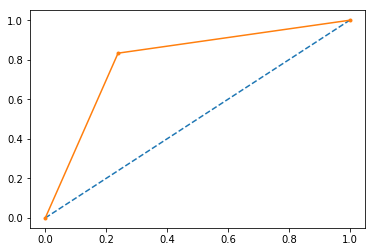

In [69]:
#Logistic Regression

features = df
labels = np.array(features['stroke'])
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 20)


train_features = train_features.drop('stroke',axis=1)
test_features = test_features.drop('stroke',axis=1)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

#print(train_labels)
lr = LogisticRegression()
lr.fit(train_features, train_labels)

print("training ------------------------------------------")

y_pred = lr.predict(train_features)
print('Coefficients = ', lr.coef_)
print('Intercept = ', lr.intercept_)
print('Accuracy {}'.format(lr.score(train_features, train_labels)))
print('Confusion = {}'.format(metrics.confusion_matrix(train_labels, y_pred)))
print(classification_report(train_labels, y_pred))

auc = roc_auc_score(train_labels, y_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


pyplot.plot(train_features,y_pred)
pyplot.show()



print("testing----------------------------------------------")

y_pred = lr.predict(test_features)
print('Coefficients = ', lr.coef_)
print('Intercept = ', lr.intercept_)
print('Accuracy {}'.format(lr.score(test_features, test_labels)))
print('Confusion = {}'.format(metrics.confusion_matrix(test_labels, y_pred)))
print(classification_report(test_labels, y_pred))

auc = roc_auc_score(test_labels, y_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


In [70]:
df = pd.read_csv('normalizee(1).csv', index_col=0)
df= df.sample(frac=1)

#print(df.head(20))

Training Features Shape: (42617, 13)
Training Labels Shape: (42617,)
Testing Features Shape: (42617, 13)
Testing Labels Shape: (42617,)
Analysis of Training Dataset
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy= 1.0
AUC: 1.000


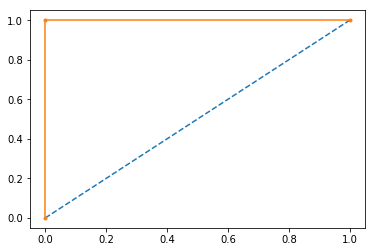

In [71]:
#Decision Tree Classification
from sklearn import tree
import graphviz


features = df
labels = np.array(features['stroke'])
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.50, random_state = 25)


train_features = train_features.drop('stroke',axis=1).drop('id',axis=1)
test_features = test_features.drop('stroke',axis=1).drop('id',axis=1)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

#Training Accuracy
clf = tree.DecisionTreeClassifier(criterion='gini',splitter='best')
clf = clf.fit(train_features, train_labels)
y_pred = clf.predict(train_features)

print("Analysis of Training Dataset")
print(clf)
print('Accuracy= {}'.format(metrics.accuracy_score(y_pred,train_labels)))

auc = roc_auc_score(train_labels, y_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()



In [72]:
print('Confusion Matrix')
print('{}'.format(metrics.confusion_matrix(y_pred,train_labels)))

Confusion Matrix
[[21352     0]
 [    0 21265]]


Analysis of Testing Dataset
Accuracy = 0.9644273412018678
Confusion Matrix
[[20548   799]
 [  717 20553]]
AUC: 0.964


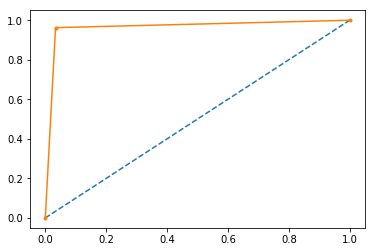

In [73]:
y_pred = clf.predict(test_features)
print('Analysis of Testing Dataset')
print('Accuracy = {}'.format(metrics.accuracy_score(y_pred,test_labels)))
print('Confusion Matrix')
print('{}'.format(metrics.confusion_matrix(y_pred,test_labels)))

auc = roc_auc_score(test_labels, y_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


In [74]:
#print(train_features.head(10))

In [75]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['age','hypertension','heart_disease','avg_glucose_level','bmi','Male','married','urban','children','Private','Self-employed','Govt_job','Never_worked'],
                                class_names=['stroke','no stroke'],filled=True,special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render("stroke-risk")

In [76]:
print(graph)

In [77]:
graph.render("stroke")

'stroke.pdf'

Training Features Shape: (68187, 13)
Training Labels Shape: (68187,)
Testing Features Shape: (17047, 13)
Testing Labels Shape: (17047,)

Accuracy = 0.6556381714989661
Confusion
[[10757   158]
 [23323 33949]]
AUC: 0.656


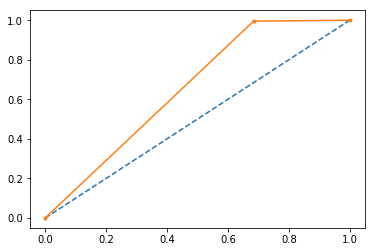

In [78]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
features = df
labels = np.array(features['stroke'])
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 25)


train_features = train_features.drop('stroke',axis=1).drop('id',axis=1)
test_features = test_features.drop('stroke',axis=1).drop('id',axis=1)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

gnb = GaussianNB()
gnb.fit(train_features,train_labels)
y_pred = gnb.predict(train_features)

y1_pred = gnb.predict(test_features)
print()

#training accuracy
print('Accuracy = {}'.format(metrics.accuracy_score(y_pred,train_labels)))
print('Confusion')
print('{}'.format(metrics.confusion_matrix(y_pred, train_labels,[0,1])))

auc = roc_auc_score(train_labels, y_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


Accuracy = 0.6560685164545081
Confusion
[[2715   41]
 [5822 8469]]
AUC: 0.657


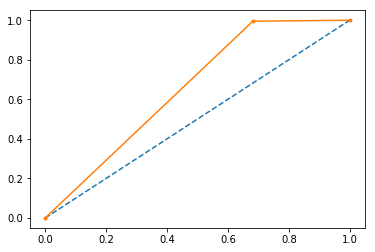

In [79]:
#testing accuracy
print('Accuracy = {}'.format(metrics.accuracy_score(y1_pred,test_labels)))
print('Confusion')
print('{}'.format(metrics.confusion_matrix(y1_pred, test_labels,[0,1])))

auc = roc_auc_score(test_labels, y1_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, y1_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()



In [80]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(train_features,train_labels)
predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)
print('Mean Absolute Error: ',round(np.mean(errors),21))

psum = sum(np.round(predictions))
tsum = sum(test_labels)
if psum > tsum:
    err = psum - tsum 
    accuracy = (1 - (err/tsum))*100
    print("Accuracy:", round(accuracy,2),'%.')
else:
    err = tsum - psum
    accuracy = (1-err/tsum)*100
    print('Accuracy:',round(accuracy,2),'%.')

Mean Absolute Error:  0.04931776852232064
Accuracy: 98.23 %.


AUC: 0.996


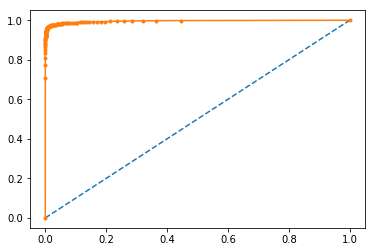

In [81]:
auc = roc_auc_score(test_labels, predictions)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


In [84]:


# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(train_features, train_labels)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file=None, 
                feature_names = ['age','hypertension','heart_disease','avg_glucose_level','bmi','Male','married','urban','children','Private','Self-employed','Govt_job','Never_worked'],
                class_names=['stroke','no stroke'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


graph = graphviz.Source(dot_data)
graph.render("stroke-risk2")



'stroke-risk2.pdf'